### import library

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### read data

In [13]:
df = pd.read_csv('ilpd.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### data understanding

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [16]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

### preprocessing

#### encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

#### imputation

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

### eda

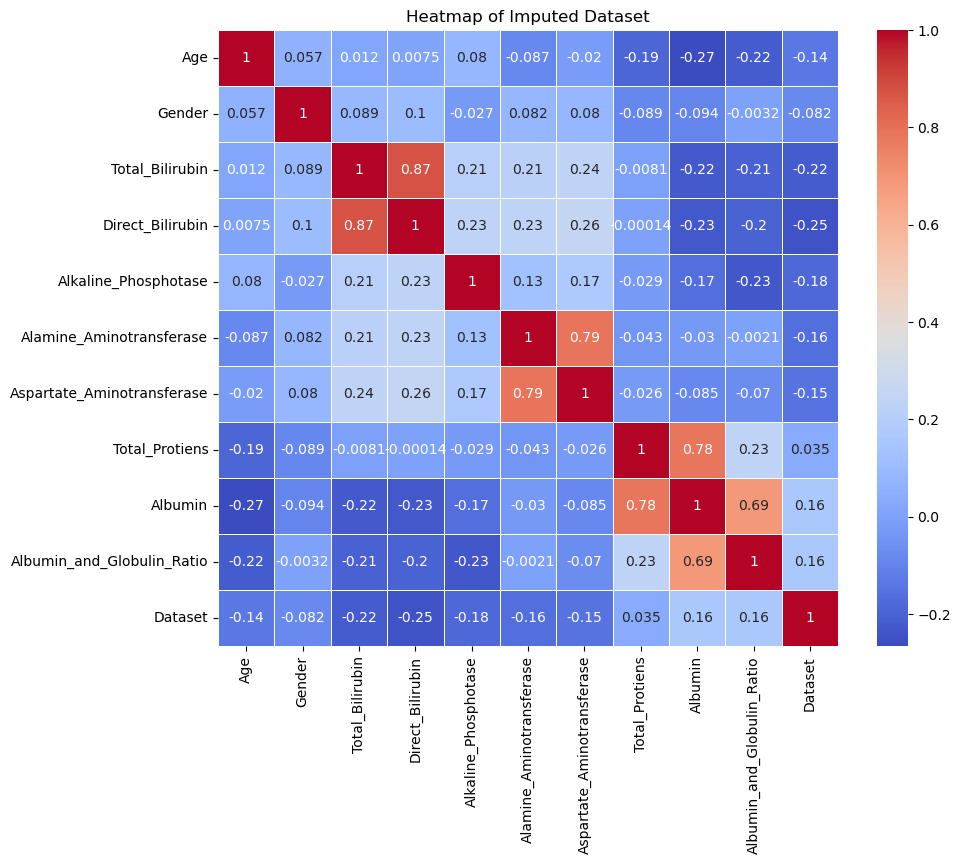

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Imputed Dataset')
plt.show()

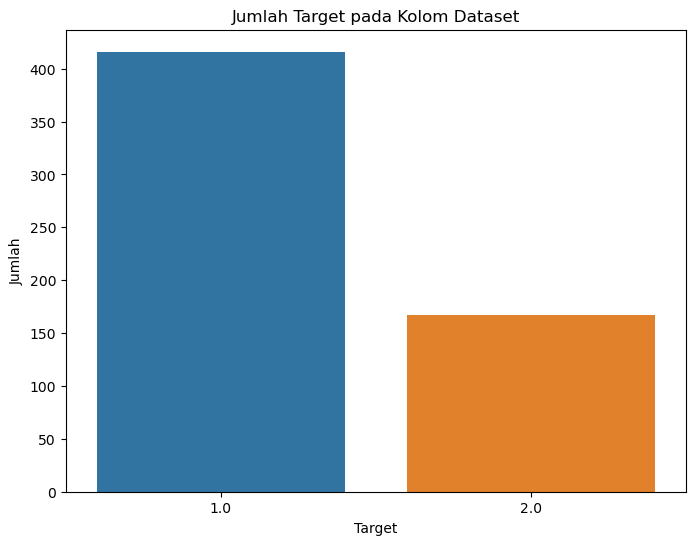

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dataset')
plt.title('Jumlah Target pada Kolom Dataset')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

In [31]:
df['Dataset'] = df['Dataset'].apply(lambda x: 1 if x == 1 else 0)

### modelling

#### baseline

In [32]:
X = df.drop('Dataset', axis=1)
y = df['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'RandomForest': RandomForestClassifier()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

for model_name, accuracy in results.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

KNN Accuracy: 0.6837606837606838
              precision    recall  f1-score   support

           0       0.38      0.37      0.37        30
           1       0.78      0.79      0.79        87

    accuracy                           0.68       117
   macro avg       0.58      0.58      0.58       117
weighted avg       0.68      0.68      0.68       117

--------------------------------------------------
Naive Bayes Accuracy: 0.5128205128205128
              precision    recall  f1-score   support

           0       0.34      1.00      0.51        30
           1       1.00      0.34      0.51        87

    accuracy                           0.51       117
   macro avg       0.67      0.67      0.51       117
weighted avg       0.83      0.51      0.51       117

--------------------------------------------------
CatBoost Accuracy: 0.7606837606837606
              precision    recall  f1-score   support

           0       0.55      0.37      0.44        30
           1       0.80

In [38]:
from sklearn.ensemble import BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Membuat model-model baseline yang sudah di-training sebelumnya
rf = RandomForestClassifier(verbose=0)
et = ExtraTreesClassifier(verbose=0)
hgbc = HistGradientBoostingClassifier(verbose=0)
catboost = CatBoostClassifier(verbose=0)
lgbm = LGBMClassifier(verbose=-1)

# Bagging
bagging = BaggingClassifier(n_estimators=10, random_state=42, verbose=0)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, bagging_pred))
print(classification_report(y_test, bagging_pred))

# Stacking
estimators = [
    ('rf', rf),
    ('et', et),
    ('hgbc', hgbc),
    ('catboost', catboost),
    ('lgbm', lgbm)
]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), verbose=0)
stacking.fit(X_train, y_train)
stacking_pred = stacking.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, stacking_pred))
print(classification_report(y_test, stacking_pred))

# Voting (hard)
voting_hard = VotingClassifier(estimators=estimators, voting='hard', verbose=False)
voting_hard.fit(X_train, y_train)
voting_hard_pred = voting_hard.predict(X_test)
print("Hard Voting Accuracy:", accuracy_score(y_test, voting_hard_pred))
print(classification_report(y_test, voting_hard_pred))

# Voting (soft)
voting_soft = VotingClassifier(estimators=estimators, voting='soft', verbose=False)
voting_soft.fit(X_train, y_train)
voting_soft_pred = voting_soft.predict(X_test)
print("Soft Voting Accuracy:", accuracy_score(y_test, voting_soft_pred))
print(classification_report(y_test, voting_soft_pred))

Bagging Accuracy: 0.6923076923076923
              precision    recall  f1-score   support

           0       0.41      0.47      0.44        30
           1       0.81      0.77      0.79        87

    accuracy                           0.69       117
   macro avg       0.61      0.62      0.61       117
weighted avg       0.71      0.69      0.70       117

Stacking Accuracy: 0.7863247863247863
              precision    recall  f1-score   support

           0       0.69      0.30      0.42        30
           1       0.80      0.95      0.87        87

    accuracy                           0.79       117
   macro avg       0.75      0.63      0.64       117
weighted avg       0.77      0.79      0.75       117

Hard Voting Accuracy: 0.7435897435897436
              precision    recall  f1-score   support

           0       0.50      0.37      0.42        30
           1       0.80      0.87      0.84        87

    accuracy                           0.74       117
   macro avg